In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\test\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

 ## Read the CSV and Perform Basic Data Cleaning     

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


## Select your features (columns)     

In [5]:
# Set features. This will also be used as your x values.
X = df.drop(columns='koi_disposition')
y = df['koi_disposition']

In [ ]:
Xsel = X.drop(['koi_impact_err2', 'koi_depth_err1', 'koi_depth_err2', 'koi_insol_err2', 'koi_prad_err2',
              'koi_insol', 'koi_prad', 'koi_prad_err1', 'koi_insol_err1', 'koi_kepmag', 'koi_time0bk'], axis=1)
Xsel

## Create a Train Test Split     
*Use koi_disposition for the y values*

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

## Pre-processing     
*Scale the data using the MinMaxScaler and perform some feature selection*

In [8]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Train the Model     
---------------

In [9]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8439824527942018
Testing Data Score: 0.8415331807780321


In [11]:
svm_model.coef_

array([[-1.80145250e+00,  7.43818958e-01, -1.00000000e+00,
         0.00000000e+00,  3.76802842e+00,  1.26057258e+00,
        -1.26057258e+00, -1.26094434e+00,  5.58853138e+00,
        -5.58853138e+00,  2.65068518e-01,  2.53395011e+00,
         5.00102706e-01, -3.72186826e+00,  5.71596497e+00,
        -5.71596497e+00,  6.85813877e-01,  2.40391833e-02,
        -2.40391833e-02,  6.28229879e-03,  1.75247855e-02,
        -3.88056070e-03,  2.75975281e+00,  2.93674333e-02,
         6.05772275e-02, -2.42996111e-02, -2.40827340e+00,
        -1.03231777e+00, -2.26538675e+00,  5.25860357e+00,
        -2.94954787e+00, -2.47229402e+00, -2.56848775e-01,
        -1.63312372e+00,  6.53126688e-01,  1.73248082e+00,
        -5.15171905e-01,  4.09042400e-01, -5.77181218e-01,
         3.84046933e-01],
       [-2.00018719e+00, -2.00022380e+00, -2.00023624e+00,
        -1.99979318e+00, -2.34096466e-04,  2.59426239e-04,
        -2.59426239e-04,  3.73543615e-04,  1.70020565e-04,
        -1.70020565e-04, -2.14

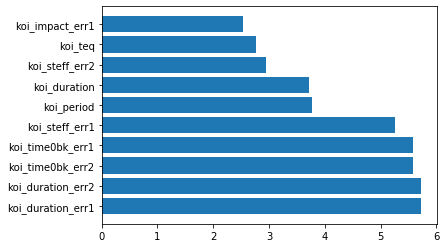

In [24]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()
    
feature_names = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'] 

svm_model.fit(X_train_scaled, y_train)
f_importances(abs(svm_model.coef_[0]), feature_names, top=10)

In [15]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

## Hyperparameter Tuning     
*Use GridSearchCV to tune the model's parameters*

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 10, 2500], 'tol': [.02]} 
grid = GridSearchCV(svm_model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
gs = grid.fit(X_train_scaled,y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
# Print out classifications report
predictions = gs.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

## Save the Model     
----------------

In [ ]:
import joblib
filename = 'Model_Files/SVM_final.sav'
joblib.dump(grid, filename)